In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

road_cat = ['KITTI_pretrained', 'scratch_model_0906']

In [2]:
df = pd.read_csv('./regression_data/road/{}/regression_mode_3.csv'.format(road_cat[0]))
df.head(5)

,Unnamed: 0,variable,value,regression
0,0,28,1089.0,28.078687
1,1,26,991.0,25.618266
2,2,24,900.0,23.328151
3,3,22,857.0,22.244186
4,4,20,798.0,20.754983


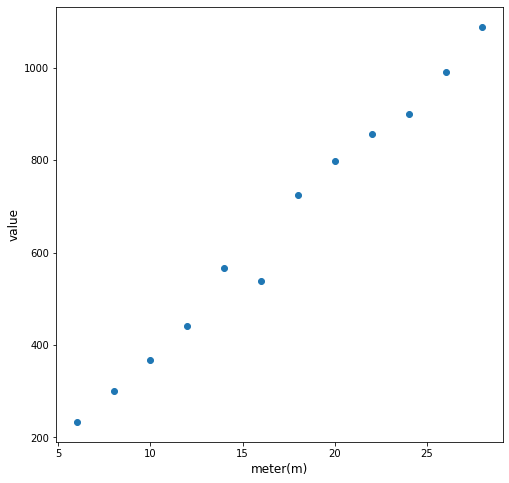

In [3]:
## Visualization
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 12
plt.scatter(df['variable'],df['value'])
 
plt.xlabel('meter(m)', fontsize=font_size)
plt.ylabel('value',fontsize=font_size)
plt.show()

In [4]:
fit = ols('value ~ variable',data=df).fit()

In [5]:
fit.summary()

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.1
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           4.45e-11
Time:                        12:13:34   Log-Likelihood:                -57.318
No. Observations:                  12   AIC:                             118.6
Df Residuals:                      10   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4904     24.135     -0.518      0.616     -66.267      41.286
variable      39.0014      1.315     29.650      0.000      36.071      41.932
==============================================================================
Omnibus:                        6.600   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                2.901
Skew:                          -1.085   Prob(JB):                        0.234
Kurtosis:                       4.047   Cond. No.                         48.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
fit.fittedvalues

0     1079.548718
1     1001.545921
2      923.543124
3      845.540326
4      767.537529
5      689.534732
6      611.531935
7      533.529138
8      455.526340
9      377.523543
10     299.520746
11     221.517949
dtype: float64

In [7]:
fit.resid

0      9.451282
1    -10.545921
2    -23.543124
3     11.459674
4     30.462471
5     34.465268
6    -73.531935
7     32.470862
8    -14.426340
9     -9.423543
10     1.579254
11    11.582051
dtype: float64

In [8]:
fitted = fit.predict(df)
residual = df['value'] - fitted

In [9]:
fitted

0     1079.548718
1     1001.545921
2      923.543124
3      845.540326
4      767.537529
5      689.534732
6      611.531935
7      533.529138
8      455.526340
9      377.523543
10     299.520746
11     221.517949
dtype: float64

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


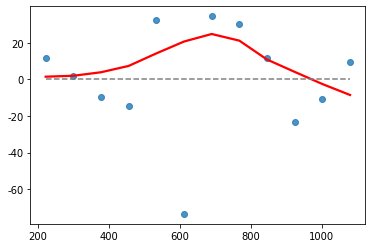

In [10]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


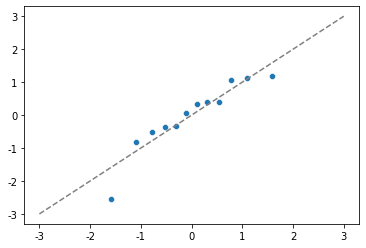

In [11]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [12]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.8921048641204834, pvalue=0.1254410743713379)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

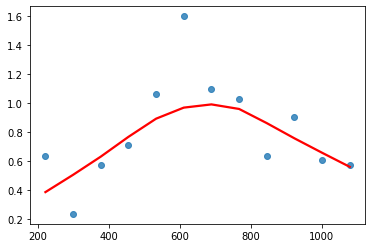

In [13]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

In [14]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(fit).cooks_distance
cd.sort_values(ascending=False).head()

6    0.277650
2    0.068530
7    0.065014
5    0.060997
4    0.057220
dtype: float64